<a href="https://colab.research.google.com/github/Nmarinsiruela/Curso-ML-Python/blob/master/NMS_3_Regresi%C3%B3n_Polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 3 - Regresión Polinomial

*   Recuerda que puedes consultar la documentación sobre una función escribiendo **?** justo después de la función: *Ejemplo: np.maximum?*
*   Puedes ejecutar el contenido de una celda con el atajo de teclado **CTRL+ENTER**
*   Utiliza **TAB** cada vez que quieras autocompletar una llamada a una función.
*   Puedes ejecutar instrucciones de bash directamente desde el notebook usando **!** : *Ejemplo: !pip install tensorflow*

## 1. Abrir el dataset.

En este caso, se cargarán los datos desde un archivo subido desde el ordenador. Para eso se tiene que desplegar el menú de la izquierda del Google Colab y en la pestaña *Archivos* hacer click en el botón *Subir* para cargar archivos desde el ordenador. Los archivos cargados tendrán que ser resubidos tras 24 horas, cuando Google reinicie la máquina virtual que soporta este Notebook.

Se carga el fichero *insurance.csv* que se puede encontrar en el github. Este archivo presenta un serie temporal que sólo tiene dos variables: ***Year***, el año al que hace referencia la variable y ***Av_claims***, la media de partes mensuales.

---

1. Cargar el archivo *insurance.csv* en una matriz de datos. Para esto vendrá bien conocer la función ***np.genfromtxt()*** de la librería ***Numpy***. Otra opción diferente es utilizar las funcionalidades de carga de datos incluidas en la librería ***Pandas***

2. Generar una gráfica donde se vea representada la evolución de ***Av_claims*** con el paso de los años. Utilizar la función ***plt.plot()***, e investigar tipos de lineas, color y tipo de marcadores (*markers*) que ofrece la función para que la gráfica tenga el siguiente estilo:

> > > > > > > ![texto alternativo](https://www.math.ubc.ca/~pwalls/math-python/img/scipy/matplotlib_10_0.png) 

3.  Realizar un modelo de ***Regresión Lineal Simple*** en la serie temporal para encontrar la línea recta que mejor se ajuste a los datos. Una vez tengan el modelo entrenado, visualizar la recta y comprobar qué tal se ajusta a los datos.

4. (Bonus) El ajuste del modelo de ***Regresión Lineal Simple*** te proporciona el valor de los parámetros cuyo valor minimiza la función del ***Error Cuadrático Medio***. Pero... ¿Y por qué creerlo cuándo puede comprobarse? Crea una gráfica donde en el eje X se representen diferentes valores de uno de los dos parámetros (A elegir entre $w_0$ o $w_1$), y en el eje Y el error obtenido a través de la función de coste, cuando se varía el valor del parámetro que se ha graficado en el eje X (el valor del otro parámetro, el que no se ha elegido para graficar en el eje X, siempre deberá de tener un valor fijo igual al obtenido en el método de Mínimos Cuadrados Ordinarios del punto 3). Esto debería de generar una curva parabólica cuyo punto mínimo, el mínimo del error, se produce cuando el parámetro en el eje X es igual al valor obtenido en el punto 3.

**Hint:** Para calcular la regresión lineal simplemente se tiene que evaluar la expresión siguiente:


> > > > >  > > > $W = (X^TX)^{-1}X^TY$



Ejercicio 2


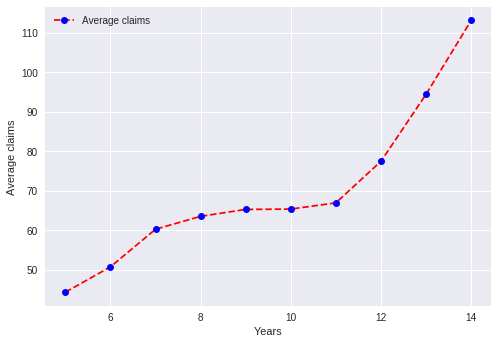

Ejercicio 3


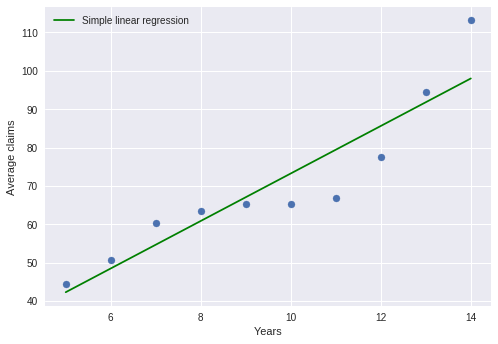

Ejercicio 4


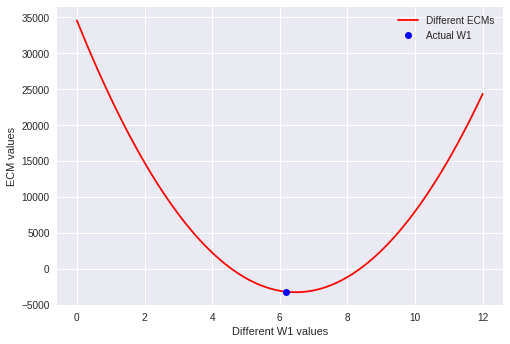

In [0]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from numpy   import genfromtxt

# COMIENZA AQUÍ TU CÓDIGO #

# 1 

# Recordar: Añadir el 'delimiter' para que el sistema entienda el fichero!
# Con Pandas: data = pd.read_csv("insurance.csv")

raw_data = genfromtxt("insurance.csv", skip_header=1, delimiter=",")
years = raw_data[:,0]
claims = raw_data[:,1]

# 2
print("Ejercicio 2")

# Con estudiar la función plot puede verse que los campos a rellenar son:
plt.plot(years, claims, color='red',linestyle='dashed',label="Average claims",
         marker='o', markerfacecolor='blue')
plt.ylabel("Average claims")
plt.xlabel("Years")
plt.legend()
plt.show()

# 3
print("Ejercicio 3")

X_raw = np.matrix(years)
X_raw = X_raw.T

Y_raw = np.matrix(claims)
Y_raw = Y_raw.T

model = linear_model.LinearRegression()
model.fit(X_raw,Y_raw)

line = model.predict(X_raw)

plt.scatter(years, claims)
plt.plot(X_raw, line, "g", label="Simple linear regression")
plt.ylabel("Average claims")
plt.xlabel("Years")
plt.legend()
plt.show()

# 4
print("Ejercicio 4")

# Se debe hacer esto debido a la estructura de Sklearn.
w0_model = model.intercept_[0]
w1_model = model.coef_[0][0]

# Se toma, por ejemplo, esta serie de valores:
w1_dyn= np.linspace(0, 12, 100)
w1_dyn = np.matrix(w1_dyn)
w1_dyn = w1_dyn.T

Yp = [w0_model +wi*X_raw.T for wi in w1_dyn]

ecm = [np.mean((y_matrix - Y_raw)**2) for y_matrix in Yp]

line_w1 = w0_model +w1_model*X_raw.T
value_w1 = np.mean((line_w1-Y_raw)**2)

plt.xlabel("Different W1 values")
plt.ylabel("ECM values")
plt.plot(w1_dyn, ecm, "r-", label="Different ECMs")
plt.plot(w1_model, value_w1, "bo", label="Actual W1")
plt.legend()
plt.show()


## 2. Regresión Polinomial.

Parece que el modelo de Regresión Lineal Simple, tal cuál está planteado, no consigue capturar por completo la relación entre ambas variables. Por suerte,se puede añadir una mayor flexibilidad al modelo haciendo uso de la magia de los polinomios! 

---

1. Implementar una función que tome como parámetro de entrada la matriz $X$ y un número entero que represente el **grado** del polinomio. La tarea de dicha función será la de crear una matriz de salida, cuyas columnas sean cada una de las columnas de la matriz original, elevadas a todas las potencias existentes entre 0 y el número especificado por el parámetro **grado**. Por ejemplo, si la matriz de entrada es la siguiente:

> > > > > > $
  X=
  \left[ {\begin{array}{cc}
   x_{11} & x_{12}\\
   x_{21} & x_{22}\\
  \end{array} } \right]
$

y el grado especificado es 3, entonces la matriz generada será:

> > > > > > $
  X=
  \left[ {\begin{array}{cc}
   1 & x_{11}  & x_{12} & x_{11}^2 & x_{12}^2 & x_{11}^3 & x_{12}^3 \\
   1 & x_{21} & x_{22} & x_{21}^2 & x_{22}^2 & x_{21}^3 & x_{22}^3 \\
  \end{array} } \right]
$

2. Una vez esté esta función implementada, utilizarla para procesar la matriz $X$ con los siguientes grados $g = [1, 2, 3, 4, 5, 6]$, y ajustar el modelo para cada una de estas matrices. Conjuntamente graficar cada una de las lineas de regresión obtenidas, así como calcular el ***Error Cuadrático Medio*** para estos modelos. Para realizar estas gráficas, investigar la función **matplotlib.pyplot.subplots** para distribuir todas las gráficas en tres filas con dos gráficas en cada una.

Ejercicio 2
Grade 1: ECM: 57.04720206060608
Grade 2: ECM: 31.607381984848463
Grade 3: ECM: 2.935640696969643
Grade 4: ECM: 2.8754511829836122
Grade 5: ECM: 0.23210655478053846
Grade 6: ECM: 0.2180263187957247


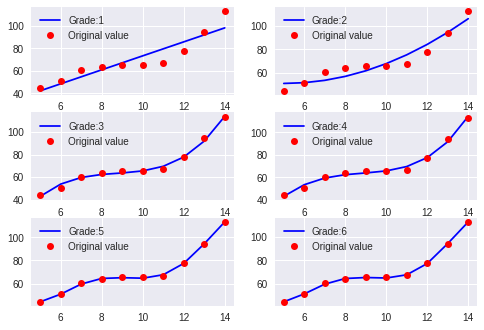

In [0]:

# Se vuelven a tomar las variables para evitar sobreescribir las anteriores.
X = X_raw
Y = np.matrix(claims)
Y = Y.T

n,m = X.shape

# 1
def reg_pol(grade):
  Xm = X
  for column in range(grade):
    if (column == 0):
      Xm = np.hstack((np.ones((n,1)), Xm))
    else:
      Xm = np.hstack((Xm, np.power(X_raw, column+1)))
  return Xm

# 2
print("Ejercicio 2")
times = 6
fig, ax = plt.subplots(int(times/2),2)
for grade in range(times):
  # Se obtiene la matriz X
  Xt = reg_pol(grade+1)
  W = np.linalg.inv(Xt.T @ Xt) @ Xt.T @ Y

  # Se calculan los valores predichos con la multiplicación matricial.
  Yp = Xt * W
  
  # Se calcula el ECM.
  ecm = np.mean(np.asarray(Yp - Y)**2)
  print("Grade",str(grade+1)+":","ECM:",ecm)

  x_ax = int(grade/2) if grade%2 == 0 else int(grade/2)
  y_ax = 0 if grade%2 == 0 else 1
  ax[x_ax, y_ax].plot(X, Yp,"b-", label="Grade: "+str(grade + 1))
  ax[x_ax, y_ax].plot(X, Y, "ro", label="Original value")
  ax[x_ax, y_ax].legend()
 
plt.show()

## 3. Regresión Polinomial - Sklearn.

---
Como ya va siendo costumbre en estos ejercicios y también en casos reales, la primera vez se implementa, pero ya a la segunda: se reutiliza. 
Repetir el mismo análisis de **Regresión Polinomial** que se ha realizado en el ejercicio anterior, pero en esta ocasión haciendo uso de la función ***sklearn.preprocessing.PolynomialFeatures()*** de la librería ***Sklearn***. Recordar que en este caso Sklearn transforma la matriz $X$ para añadir coeficientes polinomiales **y también sus interacciones**, cosa que no se ha incluido en el ejercicio anterior. Por esto mismo, es de esperar que los resultados no sean iguales (por ejemplo el*** Error Cuadrático Medio***), pero la calidad del análisis debe ser igual o mejor. Visualizar los modelos entrenados para cada grado de la misma forma que se hizo en el ejercicio previo.


Grade 1: ECM: 57.04720206060606
Grade 2: ECM: 31.607381984848466
Grade 3: ECM: 2.9356406969695703
Grade 4: ECM: 2.875451182983741
Grade 5: ECM: 0.2321065547789455
Grade 6: ECM: 0.21802631235443098


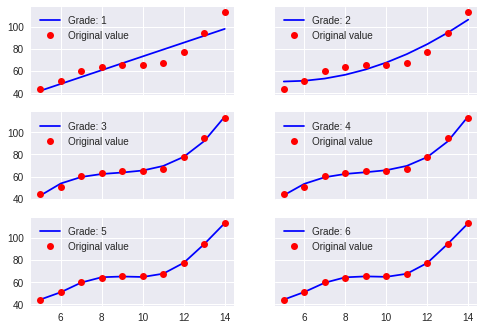

In [0]:
import sklearn
from sklearn.preprocessing import PolynomialFeatures

# Se toman de nuevo los valores para evitar sobreescritura.

X = X_raw
Y = np.matrix(claims)
Y = Y.T

l_model = linear_model.LinearRegression()

times = 6
fig, ax = plt.subplots(int(times/2),2, sharex="all", sharey="all")
for grade in range(times):
  # Se llama al modelo polinómico con el grado a evaluar.
  poly = PolynomialFeatures(grade+1)
  
  # Se calcula la matriz X.
  Xt = poly.fit_transform(X)
  
  # Se entrena el modelo lineal con X polinomial e Y.
  l_model.fit(Xt,Y)

  # Se obtienen las Y predichas.
  Yp = l_model.predict(Xt)
  
  # Se calcula el ECM por cada grado.
  ecm = np.mean(np.asarray(Yp - Y)**2)
  print("Grade",str(grade+1)+":", "ECM:",ecm)

  x_ax = int(grade/2) if grade%2 == 0 else int(grade/2)
  y_ax = 0 if grade%2 == 0 else 1
  
  ax[x_ax, y_ax].plot(X, Yp, "b-", label="Grade: "+str(grade + 1))
  ax[x_ax, y_ax].plot(X, Y, "ro", label="Original value")
  ax[x_ax, y_ax].legend()
 
plt.show()